<a href="https://colab.research.google.com/github/HarinduR/Bank_Marketing_Using_Machine_Learning/blob/main/datapreprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing dataset

## Load the cleaned dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [295]:
file_path = "/content/drive/MyDrive/MLCW/cleaned_dataset.csv"
data = pd.read_csv(file_path)

In [296]:
data.shape

(39107, 19)

In [297]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39107.000000,39107.000000,39107.000000,39107.000000,39107.000000,39107.000000,39107.000000,39107.000000,39107.000000
mean,40.122740,2.626972,960.557343,0.179968,0.058964,93.576540,-40.508732,3.595446,5165.773652
std,10.474114,2.822428,191.563542,0.504756,1.578811,0.584597,4.648807,1.744293,72.900218
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [298]:
data.duplicated().sum()

0

In [299]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39107 entries, 0 to 39106
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39107 non-null  int64  
 1   job             39107 non-null  object 
 2   marital         39107 non-null  object 
 3   education       39107 non-null  object 
 4   housing         39107 non-null  object 
 5   loan            39107 non-null  object 
 6   contact         39107 non-null  object 
 7   month           39107 non-null  object 
 8   day_of_week     39107 non-null  object 
 9   campaign        39107 non-null  int64  
 10  pdays           39107 non-null  int64  
 11  previous        39107 non-null  int64  
 12  poutcome        39107 non-null  object 
 13  emp.var.rate    39107 non-null  float64
 14  cons.price.idx  39107 non-null  float64
 15  cons.conf.idx   39107 non-null  float64
 16  euribor3m       39107 non-null  float64
 17  nr.employed     39107 non-null 

In [300]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [301]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


I loaded the cleaned dataset to analyze and gain insights into its structure and contents.

## Encode Numerical features

In [302]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [303]:
print(data[numerical_columns].describe())

                age      campaign         pdays      previous  emp.var.rate  \
count  39107.000000  39107.000000  39107.000000  39107.000000  39107.000000   
mean      40.122740      2.626972    960.557343      0.179968      0.058964   
std       10.474114      2.822428    191.563542      0.504756      1.578811   
min       17.000000      1.000000      0.000000      0.000000     -3.400000   
25%       32.000000      1.000000    999.000000      0.000000     -1.800000   
50%       38.000000      2.000000    999.000000      0.000000      1.100000   
75%       47.000000      3.000000    999.000000      0.000000      1.400000   
max       98.000000     56.000000    999.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count    39107.000000   39107.000000  39107.000000  39107.000000  
mean        93.576540     -40.508732      3.595446   5165.773652  
std          0.584597       4.648807      1.744293     72.900218  
min         92.20100

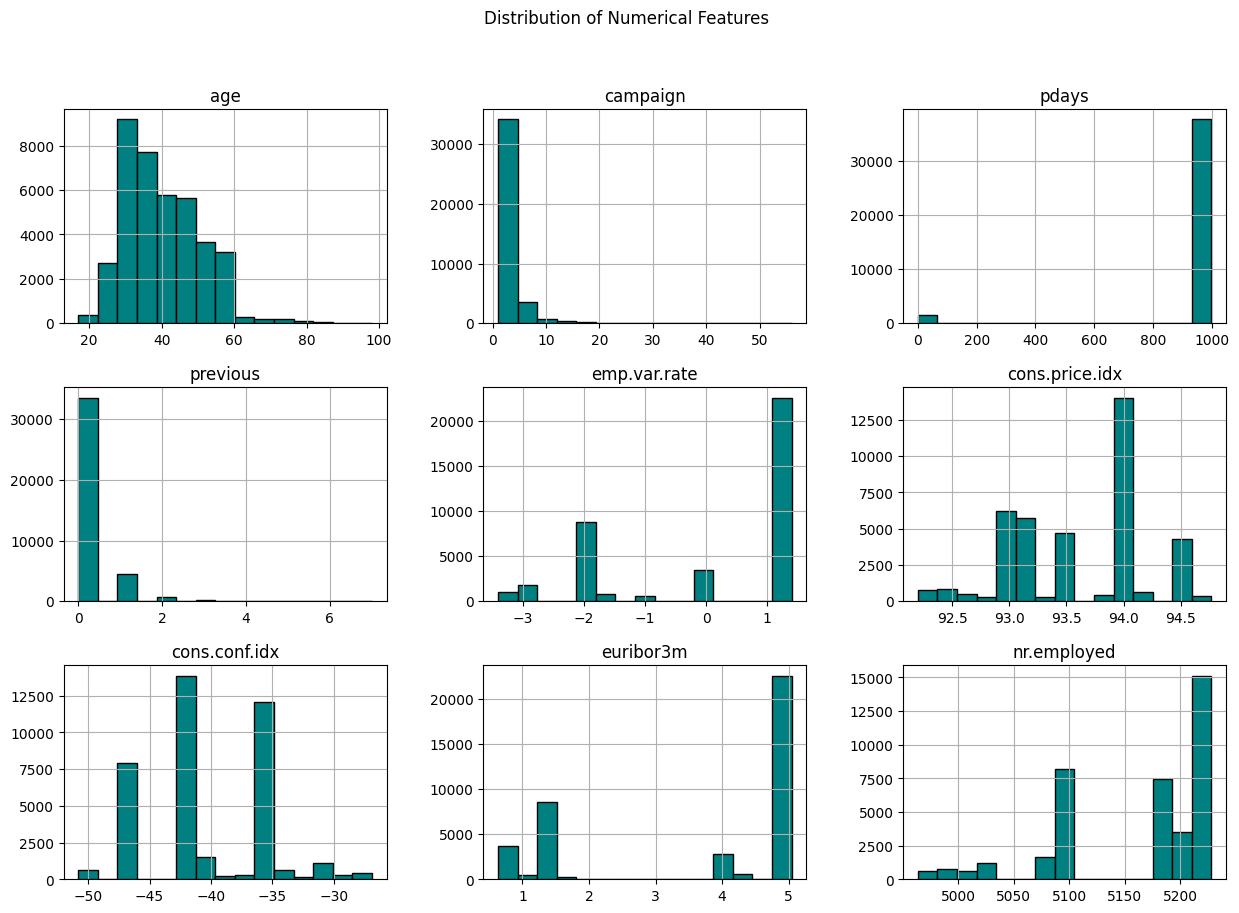

In [304]:
data[numerical_columns].hist(bins=15, figsize=(15, 10), color='teal', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

### Correlation Analysis for numerical features

In [305]:
numerical_data = data[numerical_columns]
correlation = numerical_data.corr()

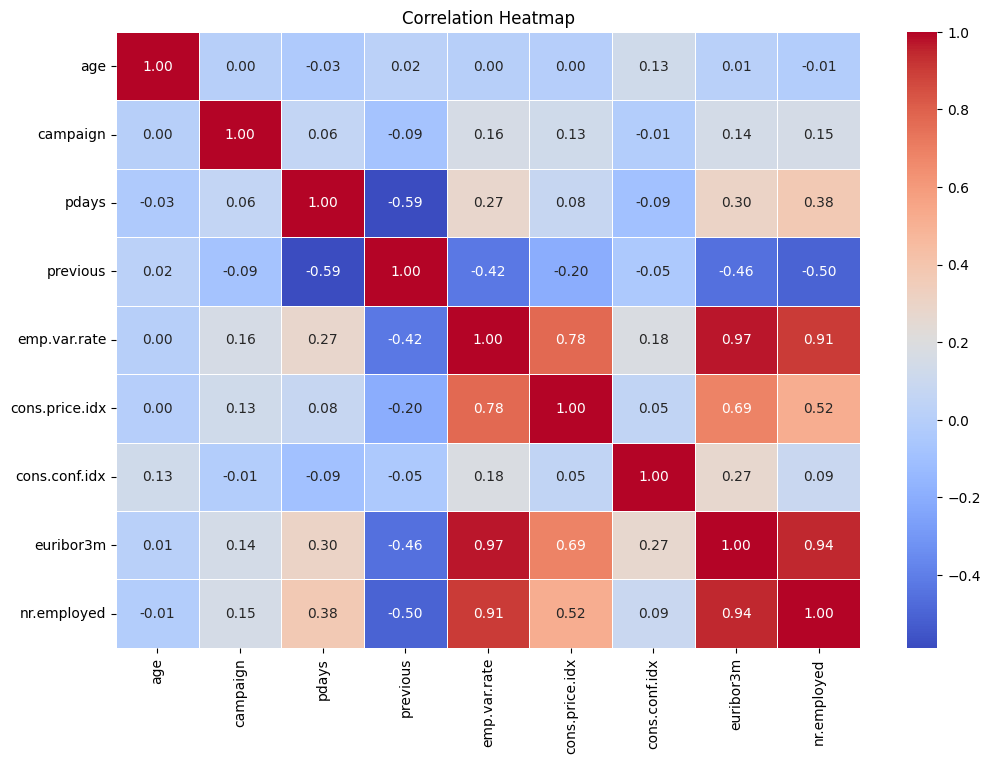

In [306]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap shows relationships between numerical features. Strong positive correlations exist between emp.var.rate, euribor3m, and nr.employed. Weak or no correlations are seen for features like age and campaign. Moderate negative correlations include previous and euribor3m. This helps identify redundant features and key predictors for the model.

In [307]:
data['y_numeric'] = data['y'].map({'yes': 1, 'no': 0})

In [308]:
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()

correlation_with_target = correlation['y_numeric'].sort_values(ascending=False)
correlation_without_target = correlation_with_target.drop('y_numeric')

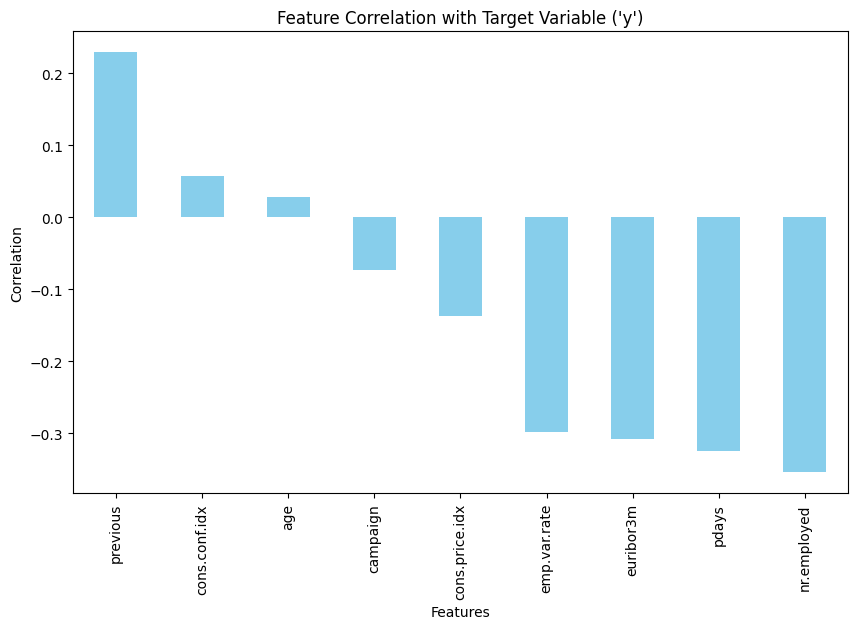

In [309]:
plt.figure(figsize=(10, 6))
correlation_without_target.plot(kind='bar', color='skyblue')
plt.title("Feature Correlation with Target Variable ('y')")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.show()


*   Previous has the strongest positive correlation, indicating it is highly related to the likelihood of a positive outcome (yes).
*   Features like **emp.var.rate, nr.employed, euribor3m, and pdays** have significant negative correlations, suggesting an inverse relationship with the target.
*   Features like cons.conf.idx and age show weak positive correlations.

In [310]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'y_numeric'],
      dtype='object')


In [311]:
data.drop(['y_numeric'], axis=1, inplace=True)

I created a column named **y_numeric** to analyze the relationship between each feature and the target variable (y). However, I later dropped this column as it was no longer needed.

### Apply PCA for highly correlated features

In [312]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [313]:
features = data[['emp.var.rate', 'euribor3m', 'nr.employed']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [314]:
pca = PCA(n_components=3)
pca.fit(features_scaled)

PCA(n_components=3)

In [315]:
explained_variance = pca.explained_variance_ratio_  # Check explained variance ratio
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.9604498  0.03268985 0.00686035]


In [316]:
pca = PCA(n_components=2)   # Decide on  2 components for 95% variance
features_pca = pca.fit_transform(features_scaled)

total_variance_explained = sum(pca.explained_variance_ratio_)
print(f"Total Variance Explained by Selected Components: {total_variance_explained:.2f}")

Total Variance Explained by Selected Components: 0.99


In [317]:
data['PC1'] = features_pca[:, 0]
data['PC2'] = features_pca[:, 1]

This code applies PCA to reduce the dimensionality of the features emp.var.rate, euribor3m, and nr.employed. After scaling the features, PCA identifies that two components can explain 99% of the variance. The transformed dataset (PC1 and PC2) is ready for further analysis, simplifying the data while retaining critical information

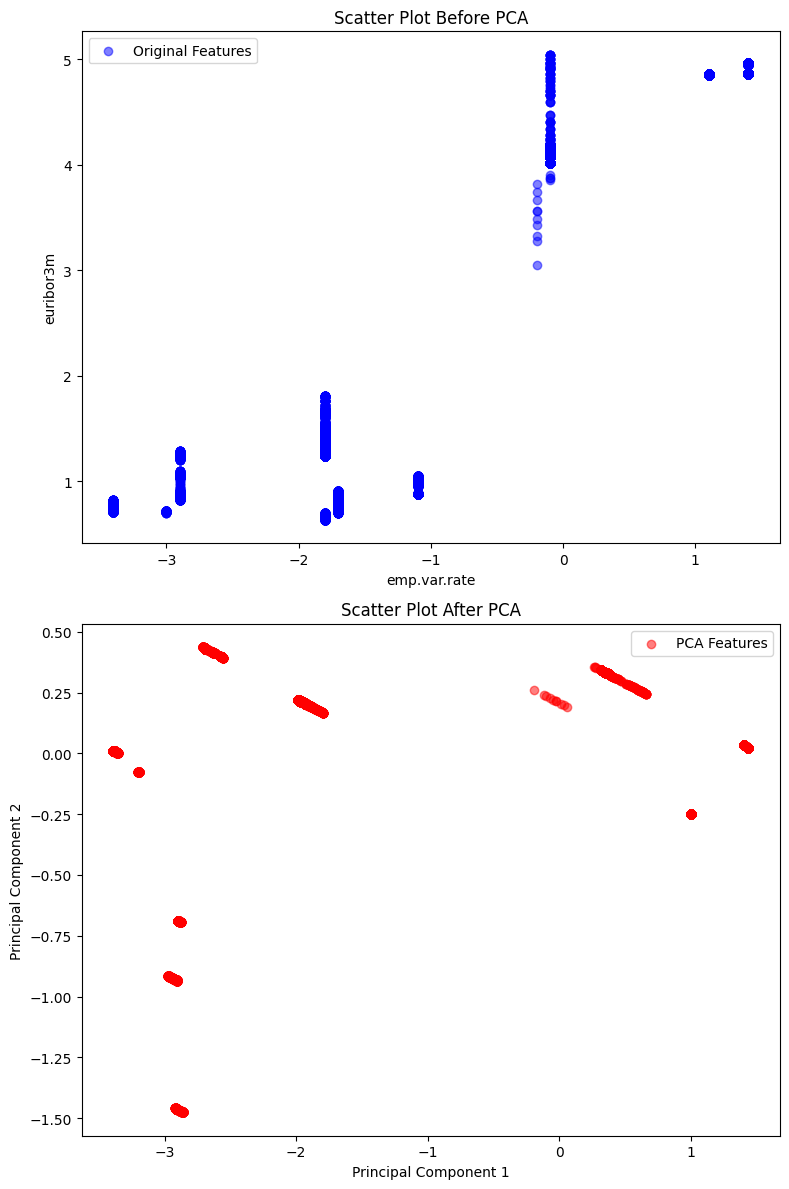

In [318]:
plt.figure(figsize=(8, 12))
plt.subplot(2, 1, 1)
plt.scatter(data['emp.var.rate'], data['euribor3m'], c='blue', alpha=0.5, label='Original Features')
plt.xlabel('emp.var.rate')
plt.ylabel('euribor3m')
plt.title('Scatter Plot Before PCA')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c='red', alpha=0.5, label='PCA Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot After PCA')
plt.legend()

plt.tight_layout()
plt.show()

* Top Plot (Before PCA): Displays the original features emp.var.rate and euribor3m, showing their distribution and relationships in the original multidimensional space.

* Bottom Plot (After PCA): Shows the transformed data in terms of the first two principal components (PC1 and PC2). PCA effectively reduces the dimensionality while retaining most of the variance, providing a more compact and interpretable representation of the data.

In [319]:
data.drop(['emp.var.rate', 'euribor3m', 'nr.employed'], axis=1, inplace=True)

### Outlier Detection and Treatment for Numerical features

In [320]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [321]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:", numerical_cols)

Numerical Columns: Index(['age', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'PC1', 'PC2'],
      dtype='object')


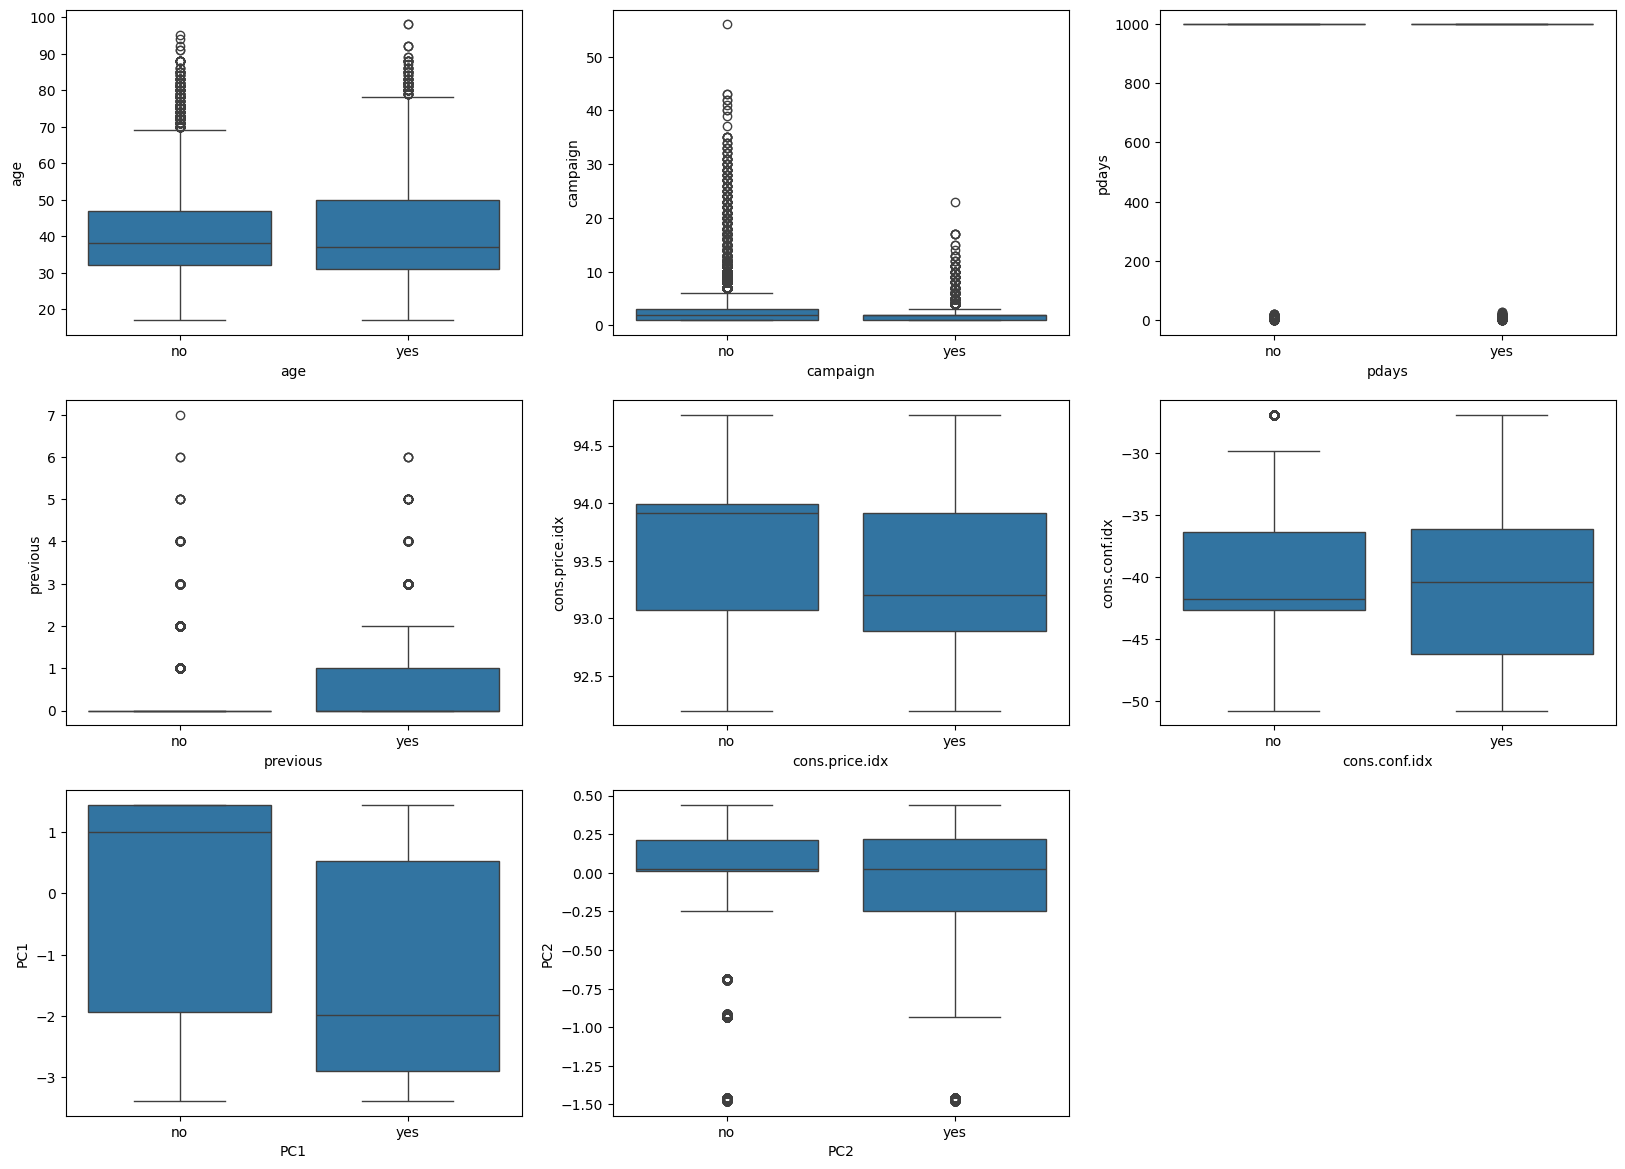

In [322]:
plt.figure(figsize=(20, 60), facecolor='white')

plotnumber = 1
for feature in numerical_cols:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(x="y", y=data[feature], data=data)
    plt.xlabel(feature)
    plotnumber += 1

plt.show()

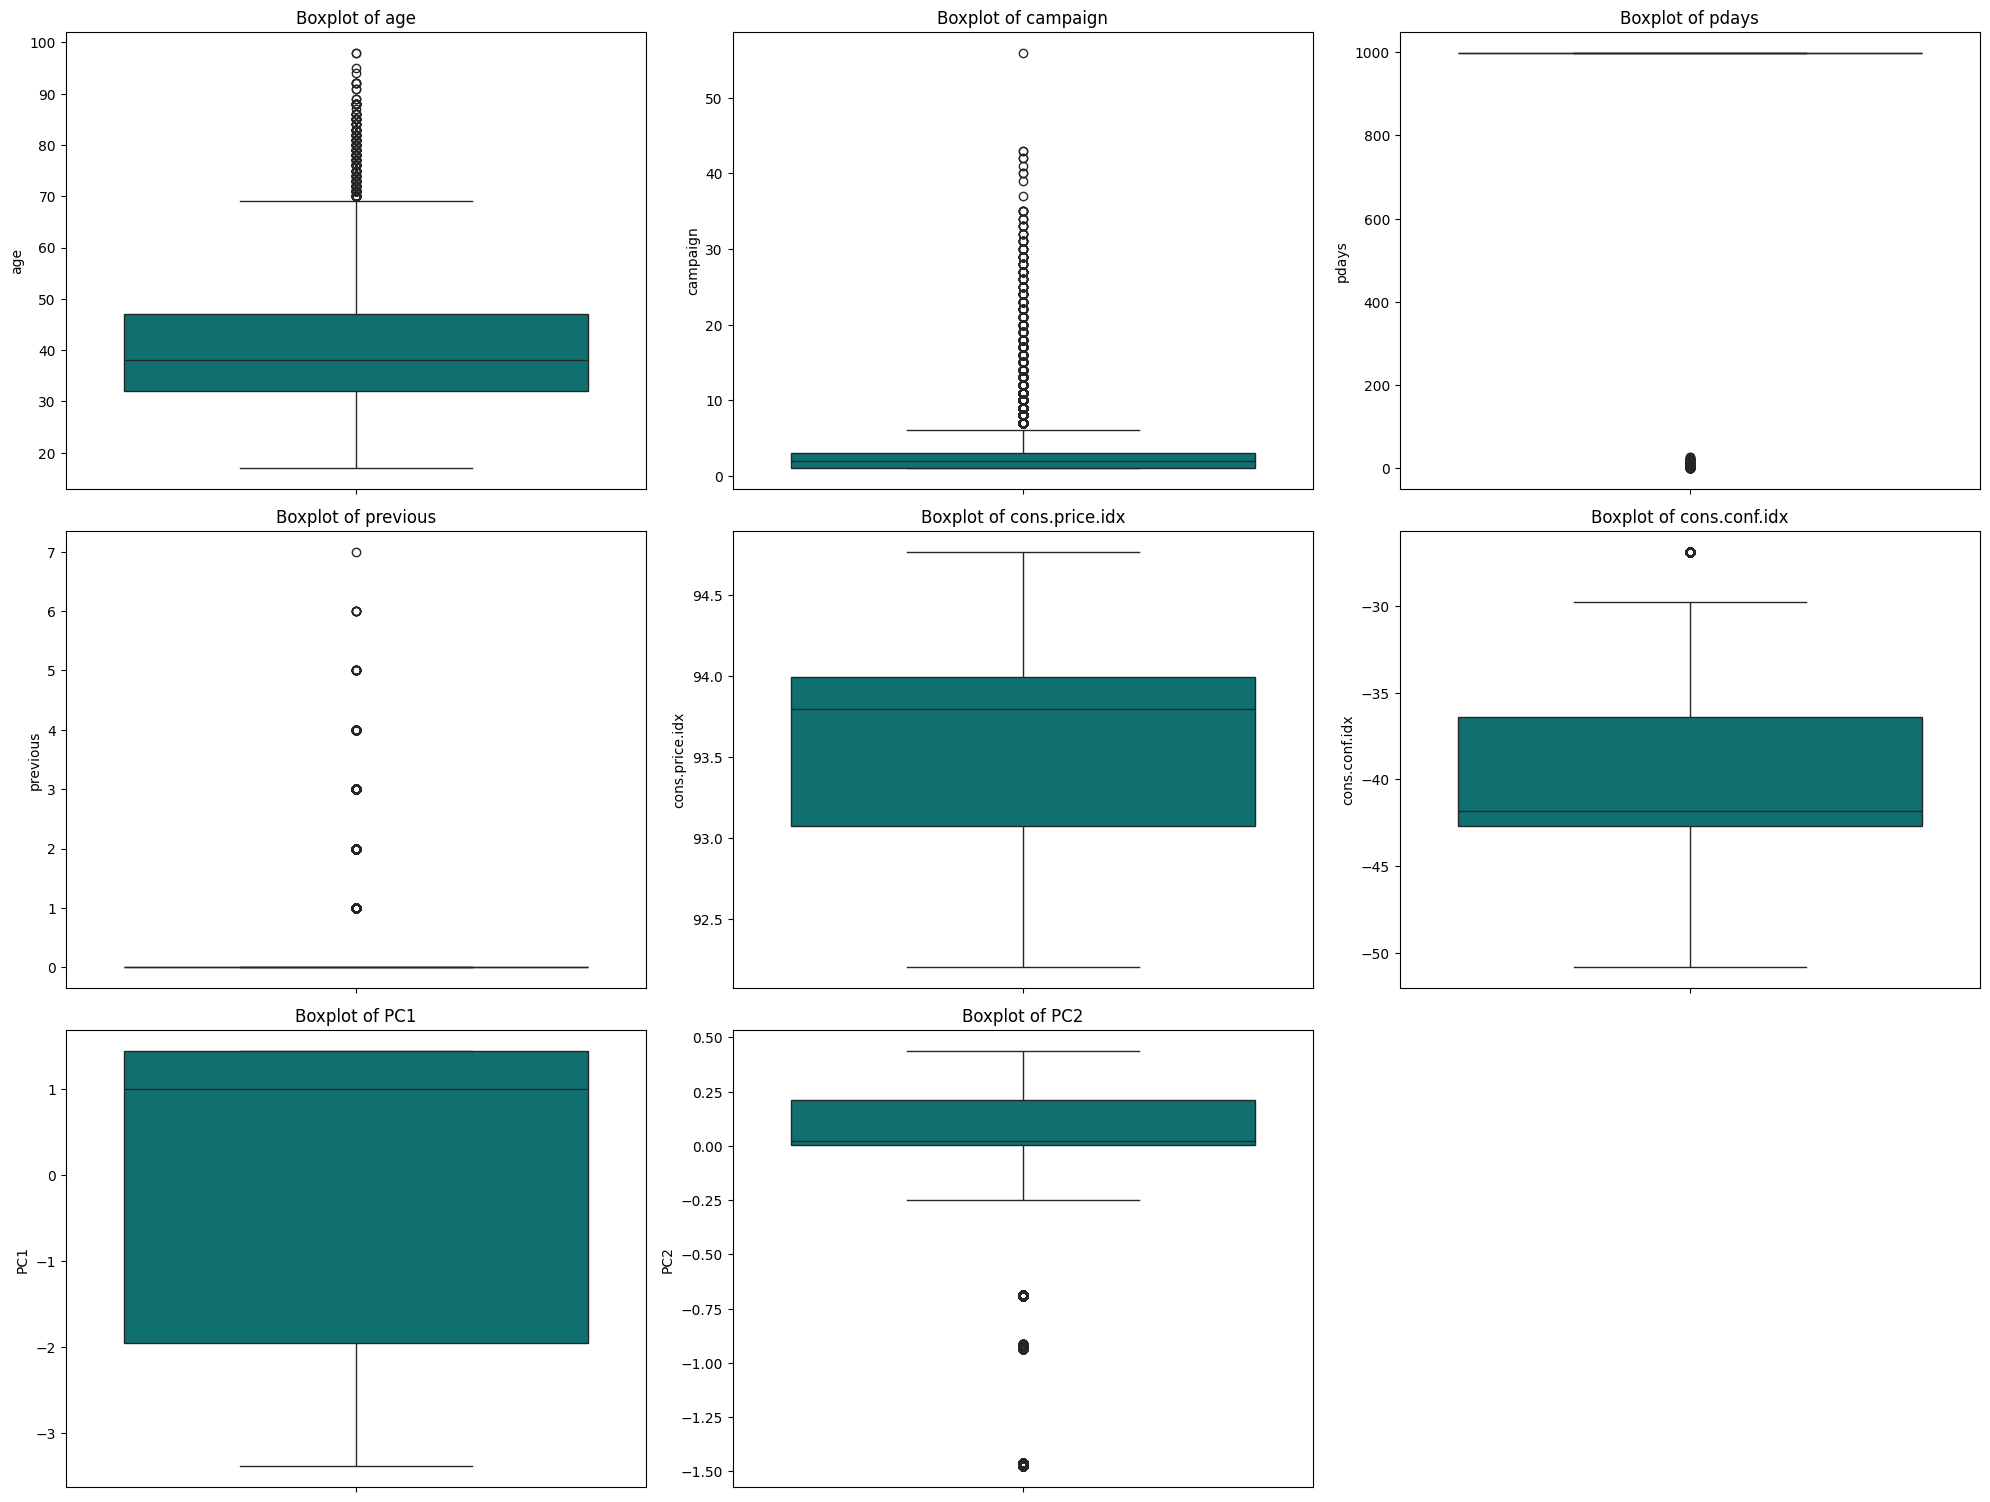

In [323]:
plt.figure(figsize=(20, 60), facecolor='white')

plotnumber = 1
for numerical_feature in numerical_cols:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(y=data[numerical_feature], color='teal')
    plt.title(f'Boxplot of {numerical_feature}')
    plt.xlabel('')
    plt.ylabel(numerical_feature)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [324]:
# Outlier treatment: Winsorization (clipping)
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip outliers
    data[col] = np.clip(data[col], lower_bound, upper_bound)

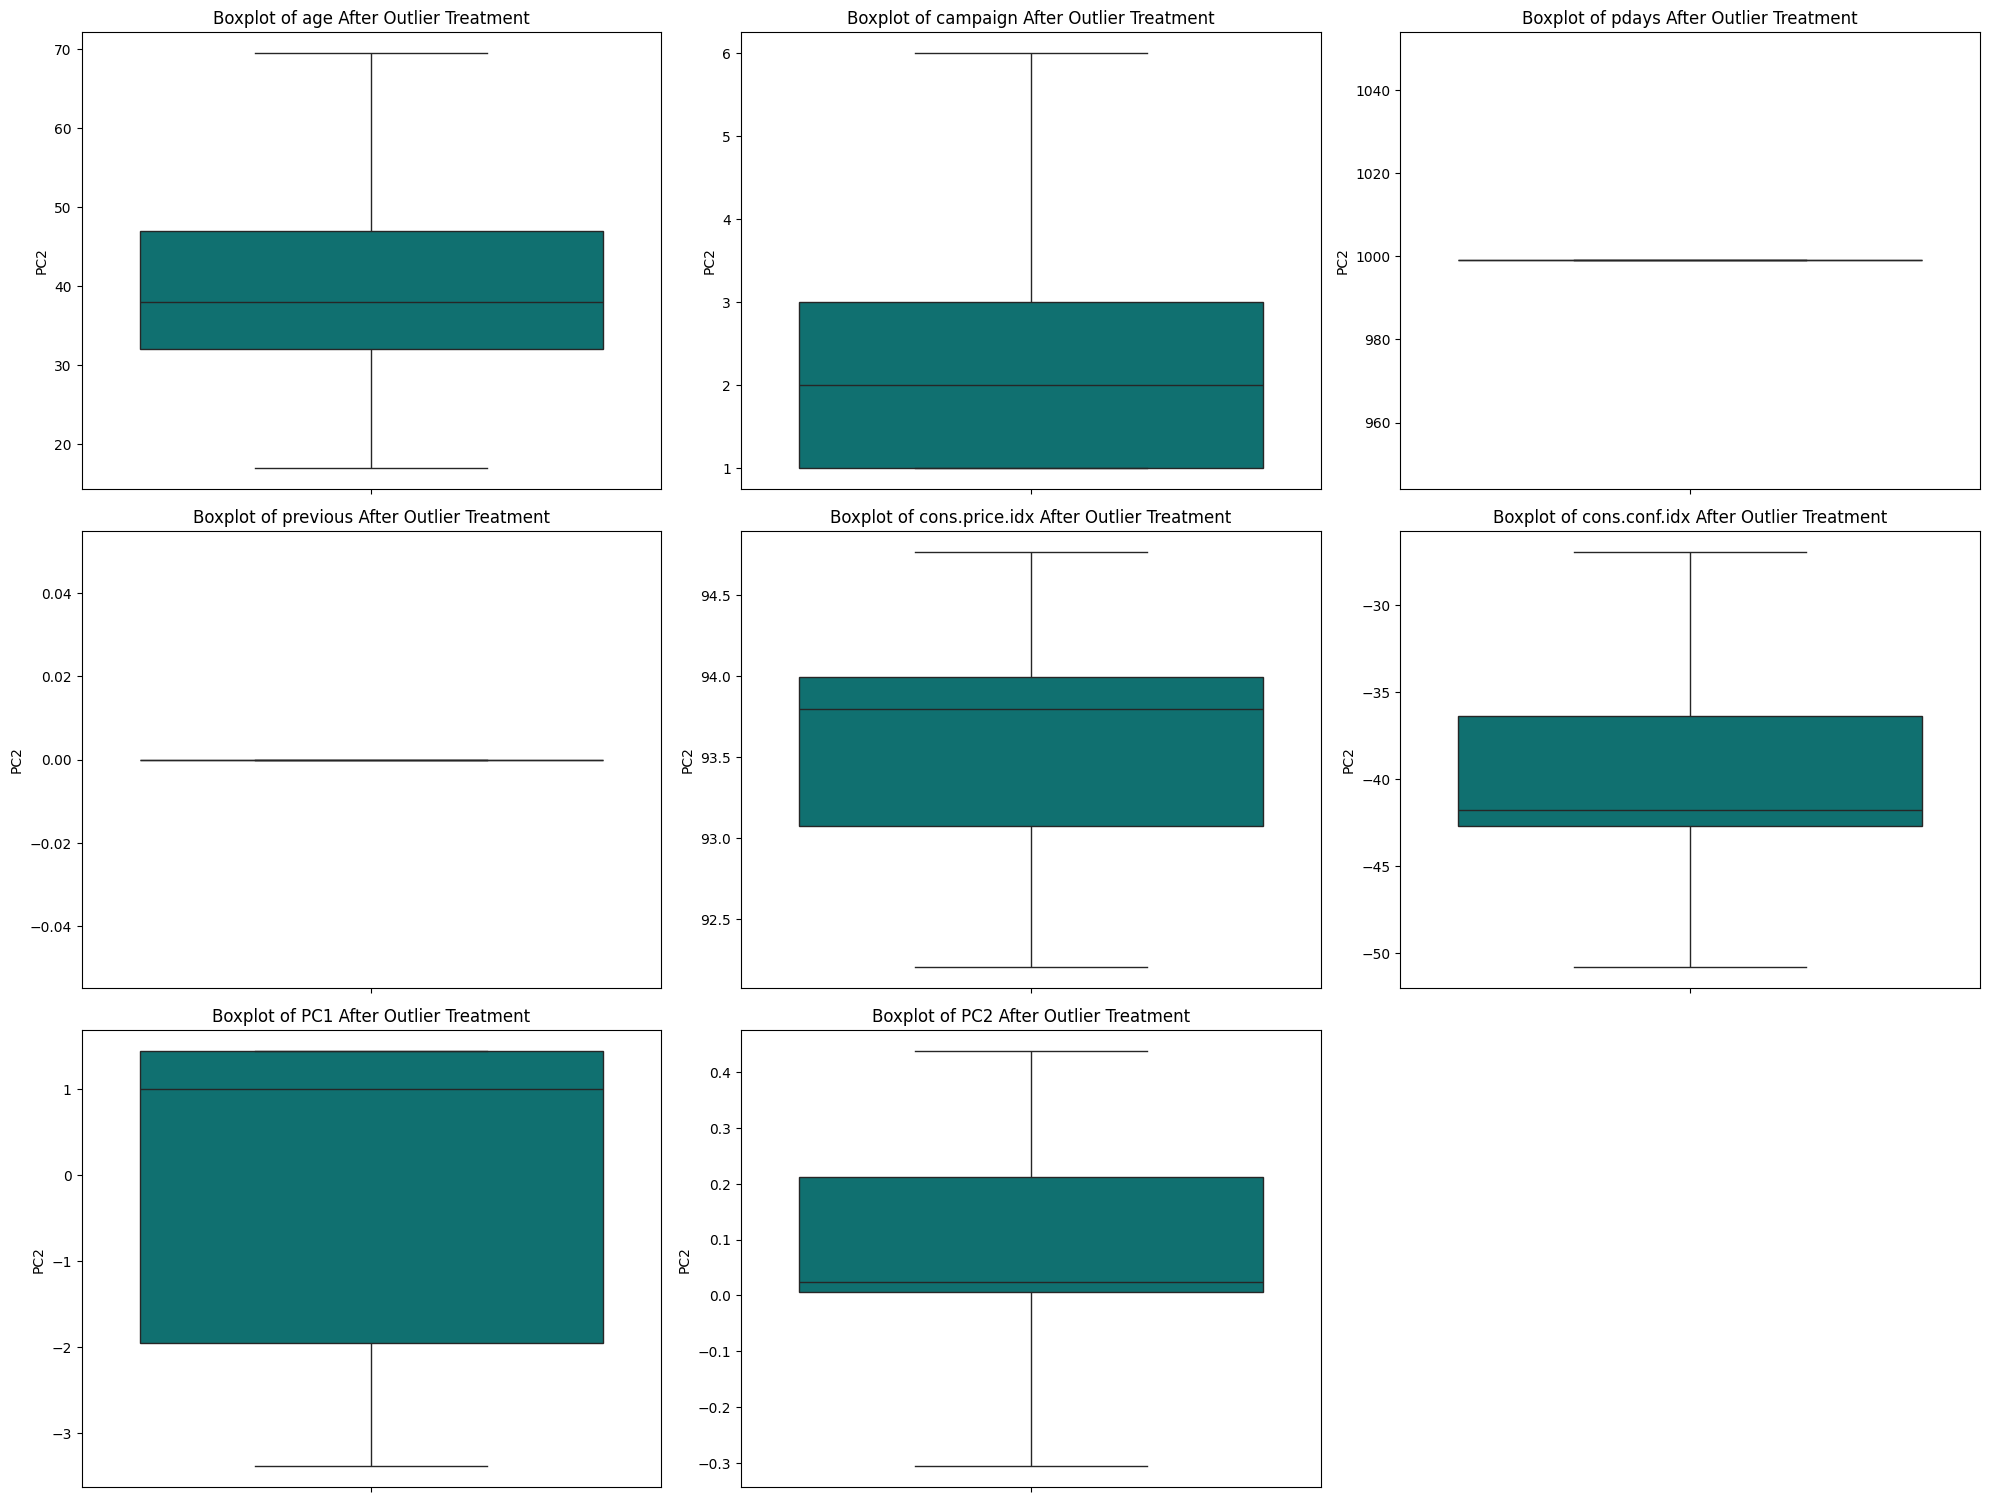

In [325]:
plt.figure(figsize=(20, 60), facecolor='white')

plotnumber = 1
for col in numerical_cols:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(y=data[col], color='teal')
    plt.title(f"Boxplot of {col} After Outlier Treatment")
    plt.xlabel('')
    plt.ylabel(numerical_feature)
    plotnumber += 1

plt.tight_layout()
plt.show()

* **Detection**: Boxplots identified outliers in numerical features based on their distribution and extreme values.
* **Treatment**: Winsorization (clipping) adjusted outliers using IQR-based bounds to reduce their influence without removing data.
* **Result**: Post-treatment boxplots confirm that outliers are now within acceptable ranges, creating a cleaner dataset for modeling.

## Encode categorical features

### describe the categorical feature

In [326]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [327]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Column: {col}")
    print(data[col].unique())

Column: job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'other' 'entrepreneur'
 'student']
Column: marital
['married' 'single' 'divorced']
Column: education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'other' 'university.degree' 'illiterate']
Column: housing
['no' 'yes']
Column: loan
['no' 'yes']
Column: contact
['telephone' 'cellular']
Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Column: day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
Column: poutcome
['nonexistent' 'failure' 'success']
Column: y
['no' 'yes']


In [328]:
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(data[col].value_counts())


Unique values in 'job':
job
admin.           9800
blue-collar      8717
technician       6359
services         3768
management       2809
retired          1678
entrepreneur     1403
self-employed    1381
housemaid        1028
unemployed        988
student           851
other             325
Name: count, dtype: int64

Unique values in 'marital':
marital
married     23717
single      10942
divorced     4448
Name: count, dtype: int64

Unique values in 'education':
education
university.degree      11487
high.school             9061
basic.9y                5719
professional.course     4985
basic.4y                3947
basic.6y                2207
other                   1683
illiterate                18
Name: count, dtype: int64

Unique values in 'housing':
housing
yes    21344
no     17763
Name: count, dtype: int64

Unique values in 'loan':
loan
no     32939
yes     6168
Name: count, dtype: int64

Unique values in 'contact':
contact
cellular     24514
telephone    14593
Name: count, dtype

### Categorical Features by Target Variable ('y')

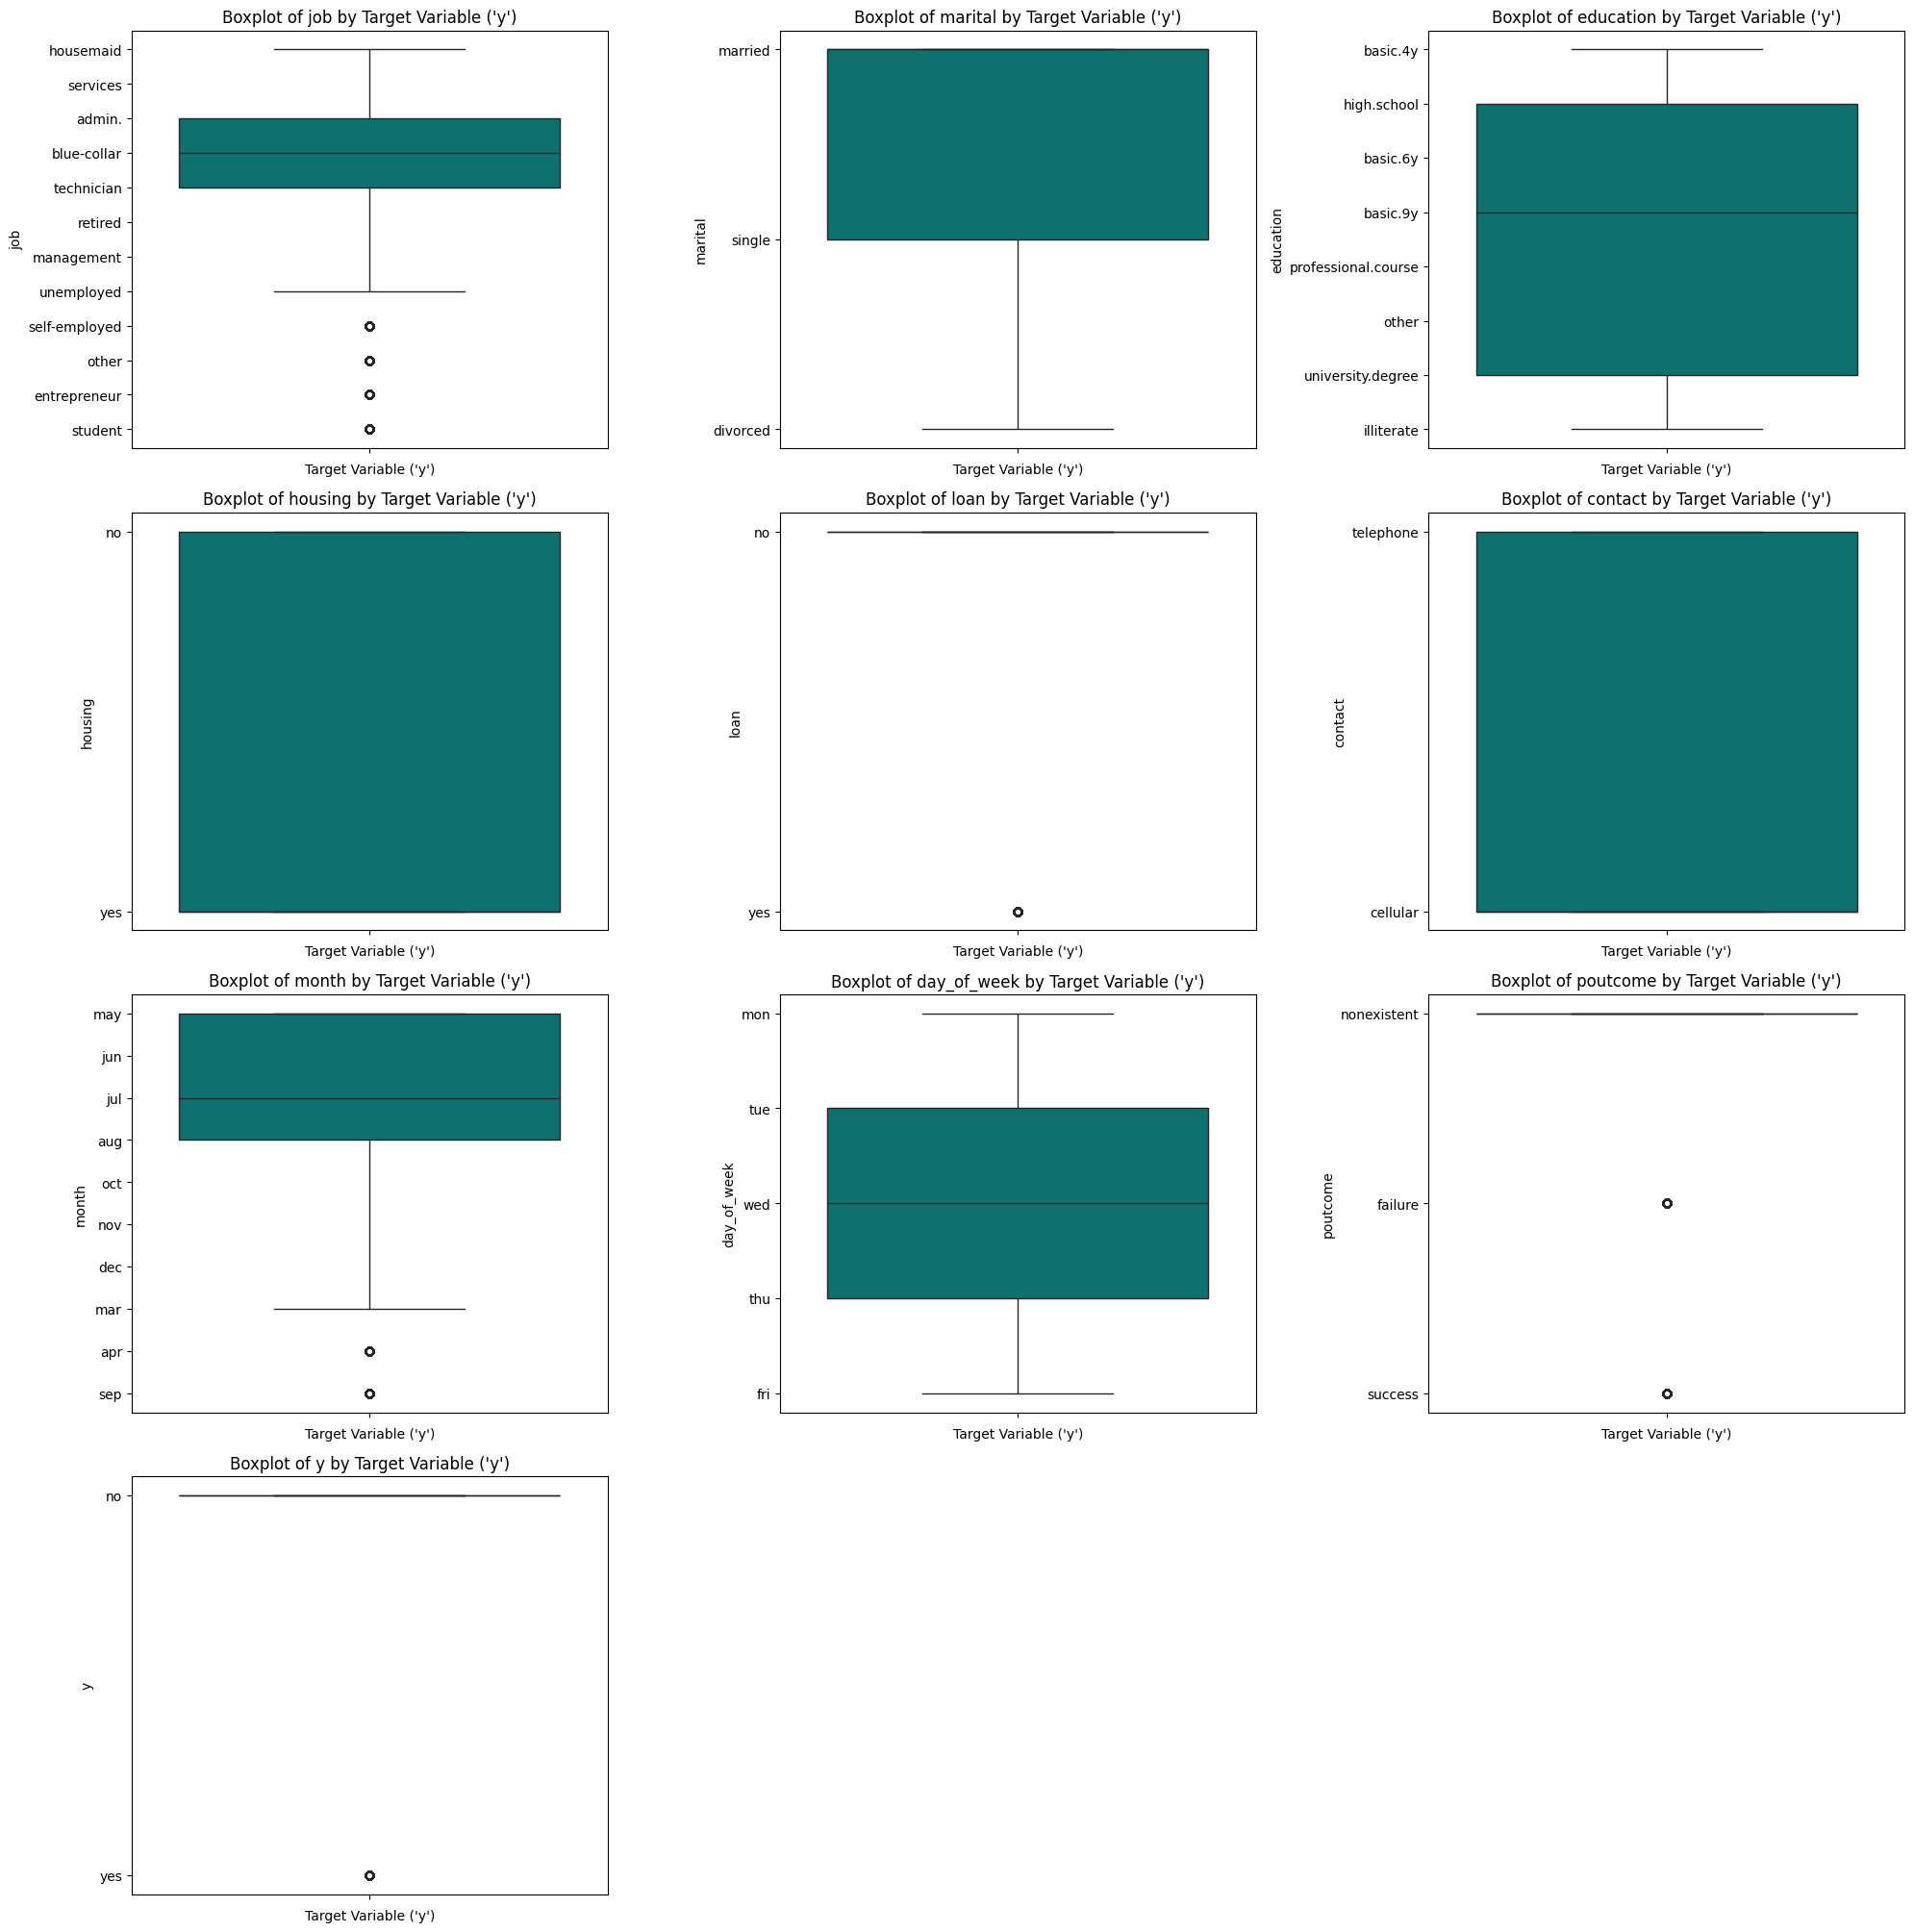

In [329]:
plt.figure(figsize=(20, 60), facecolor='white')

plotnumber = 1
for feature in categorical_columns:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(y=data[feature], color='teal')
    plt.title(f"Boxplot of {feature} by Target Variable ('y')")
    plt.xlabel("Target Variable ('y')")
    plt.ylabel(feature)
    plotnumber += 1

plt.tight_layout()
plt.show()

### Apply One-Hot encoding

In [330]:
nominal_columns = ['education', 'job', 'marital', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data = pd.get_dummies(data, columns=nominal_columns, drop_first=True)

In [340]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39107 entries, 0 to 39106
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            39107 non-null  float64
 1   campaign                       39107 non-null  int64  
 2   pdays                          39107 non-null  int64  
 3   previous                       39107 non-null  int64  
 4   cons.price.idx                 39107 non-null  float64
 5   cons.conf.idx                  39107 non-null  float64
 6   y                              39107 non-null  object 
 7   PC1                            39107 non-null  float64
 8   PC2                            39107 non-null  float64
 9   education_basic.6y             39107 non-null  bool   
 10  education_basic.9y             39107 non-null  bool   
 11  education_high.school          39107 non-null  bool   
 12  education_illiterate           39107 non-null 

In [341]:
data.shape

(39107, 47)

In [342]:
print(data.head())

    age  campaign  pdays  previous  cons.price.idx  cons.conf.idx   y  \
0  56.0         1    999         0          93.994          -36.4  no   
1  57.0         1    999         0          93.994          -36.4  no   
2  37.0         1    999         0          93.994          -36.4  no   
3  40.0         1    999         0          93.994          -36.4  no   
4  56.0         1    999         0          93.994          -36.4  no   

        PC1       PC2  education_basic.6y  ...  month_may  month_nov  \
0  1.000487 -0.248166               False  ...       True      False   
1  1.000487 -0.248166               False  ...       True      False   
2  1.000487 -0.248166               False  ...       True      False   
3  1.000487 -0.248166                True  ...       True      False   
4  1.000487 -0.248166               False  ...       True      False   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0      False      False             True          

## Feature Scaling(StandardScaler)

In [343]:
from sklearn.preprocessing import StandardScaler

In [344]:
print("Before Scaling:")
print(data[numerical_cols].describe())

Before Scaling:
                age      campaign    pdays  previous  cons.price.idx  \
count  39107.000000  39107.000000  39107.0   39107.0    39107.000000   
mean      40.036144      2.319687    999.0       0.0       93.576540   
std       10.177770      1.566877      0.0       0.0        0.584597   
min       17.000000      1.000000    999.0       0.0       92.201000   
25%       32.000000      1.000000    999.0       0.0       93.075000   
50%       38.000000      2.000000    999.0       0.0       93.798000   
75%       47.000000      3.000000    999.0       0.0       93.994000   
max       69.500000      6.000000    999.0       0.0       94.767000   

       cons.conf.idx           PC1           PC2  
count   39107.000000  3.910700e+04  39107.000000  
mean      -40.509289  9.302628e-17      0.037401  
std         4.647182  1.697476e+00      0.204687  
min       -50.800000 -3.389961e+00     -0.306062  
25%       -42.700000 -1.958840e+00      0.005225  
50%       -41.800000  1.00048

In [345]:
scaler = StandardScaler()

scaled_numerical = pd.DataFrame(scaler.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [346]:
print("After Scaling:")
print(scaled_numerical[numerical_cols].describe())

After Scaling:
                age      campaign    pdays  previous  cons.price.idx  \
count  3.910700e+04  3.910700e+04  39107.0   39107.0    3.910700e+04   
mean   1.875061e-16  1.104687e-16      0.0       0.0   -1.814012e-14   
std    1.000013e+00  1.000013e+00      0.0       0.0    1.000013e+00   
min   -2.263407e+00 -8.422511e-01      0.0       0.0   -2.353001e+00   
25%   -7.895882e-01 -8.422511e-01      0.0       0.0   -8.579354e-01   
50%   -2.000606e-01 -2.040308e-01      0.0       0.0    3.788296e-01   
75%    6.842309e-01  4.341896e-01      0.0       0.0    7.141075e-01   
max    2.894960e+00  2.348851e+00      0.0       0.0    2.036403e+00   

       cons.conf.idx           PC1           PC2  
count   3.910700e+04  3.910700e+04  3.910700e+04  
mean    1.290740e-15 -1.395394e-16  6.976971e-17  
std     1.000013e+00  1.000013e+00  1.000013e+00  
min    -2.214427e+00 -1.997086e+00 -1.678010e+00  
25%    -4.714125e-01 -1.153987e+00 -1.571950e-01  
50%    -2.777442e-01  5.894046

Standard Scaler was applied to numerical features to normalize data by centering it around the mean and scaling it to unit variance.

In [348]:
data.to_csv("/content/drive/MyDrive/MLCW/preprocessed.csv", index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!
